In [4]:
import numpy as np 
import pandas as pd 

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)
print(hub.__version__)

2.3.1
0.9.0


In [12]:
data = pd.read_csv('./inputs/dog-breed-identification/labels.csv')

In [13]:
data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,e5271262c8e4fd79dff994f9ed711dfc,scottish_deerhound
freq,1,126


In [14]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


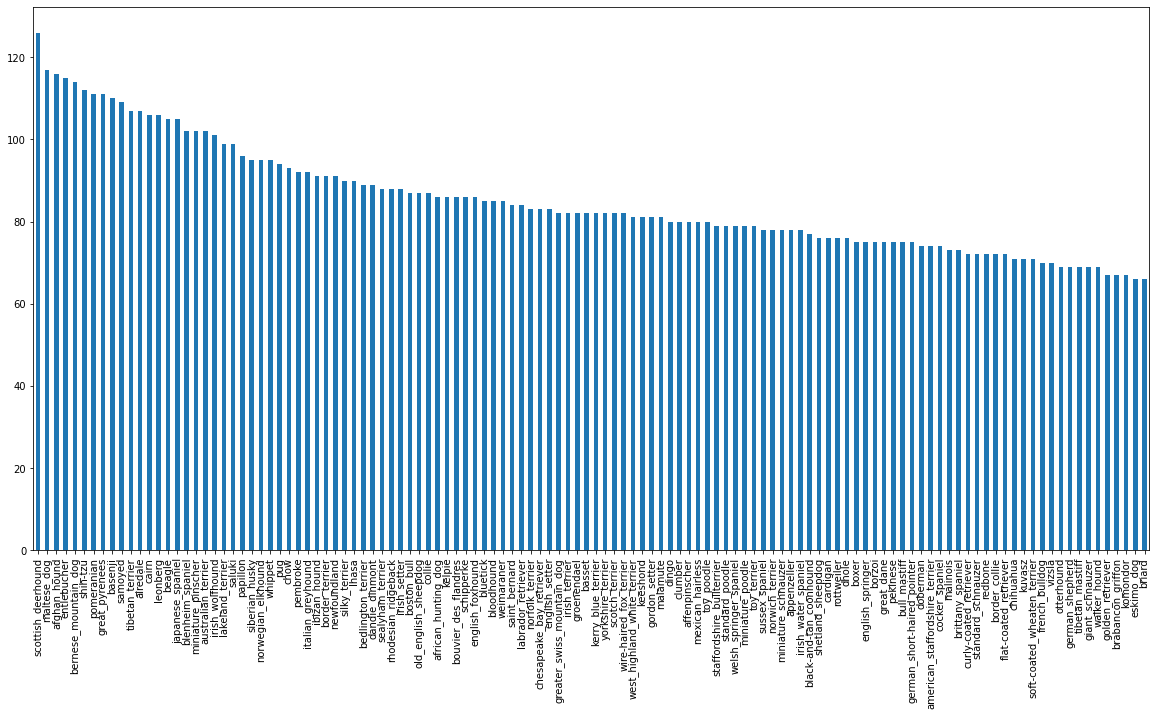

In [15]:
data["breed"].value_counts().plot.bar(figsize=(20, 10));

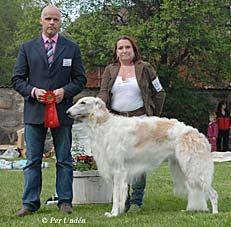

In [33]:
from IPython.display import display, Image
Image("./inputs/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg")

In [36]:
train_path = './inputs/dog-breed-identification/train/'

In [37]:
filenames = [train_path + file_name + ".jpg" for file_name in data['id']]

In [38]:
filenames[0]

'./inputs/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

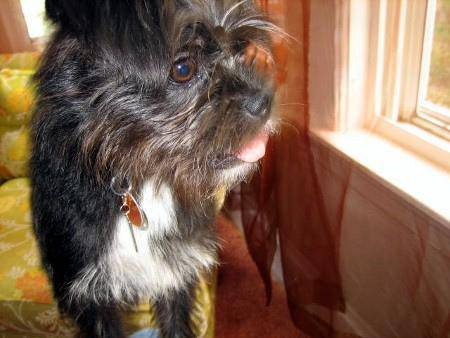

In [39]:
Image(filenames[30])

In [40]:
labels = data["breed"].to_numpy()
unique = np.unique(labels)

In [41]:
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [42]:
len(unique)

120

In [43]:
print(labels[2])
labels[2] == unique

pekinese


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [44]:
boolean_labels = [label == np.array(unique) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [45]:
np.array(unique)

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [46]:
print(labels[2])
print(boolean_labels[2].argmax())
print(boolean_labels[2].astype(int))

pekinese
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [47]:
len(boolean_labels)

10222

In [48]:
#making the split 
X = filenames
y = boolean_labels

print(len(X))
print(len(y))

num_images = 1000

10222
10222


In [51]:
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:num_images],
                                                  y[:num_images], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [52]:
print(X_train[:2])
y_train[:2]

['./inputs/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg', './inputs/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg']


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [53]:
from matplotlib.pyplot import imread
img = imread(filenames[24])
img.shape

(280, 200, 3)

In [54]:
tf.constant(img)[:3]

<tf.Tensor: shape=(3, 200, 3), dtype=uint8, numpy=
array([[[ 0,  4,  0],
        [ 0,  9,  3],
        [ 2, 11,  6],
        ...,
        [ 0, 13,  4],
        [12, 25, 16],
        [ 0,  5,  0]],

       [[ 0,  9,  3],
        [ 7, 18, 12],
        [14, 23, 18],
        ...,
        [23, 36, 27],
        [34, 47, 38],
        [10, 23, 14]],

       [[ 0, 10,  4],
        [ 9, 20, 14],
        [17, 26, 21],
        ...,
        [17, 33, 23],
        [27, 43, 33],
        [ 1, 17,  7]]], dtype=uint8)>

In [55]:
IMG_SIZE = 224
def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.convert_image_dtype(image , tf.float32)
    image = tf.image.resize(image, size  = [IMG_SIZE, IMG_SIZE])
    return image

In [56]:
def image_label(image_path , label):
    image = process_image(image_path)
    return image,label

In [57]:
BATCH_SIZE = 32
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("creating test bacthes...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print("creating valid_data...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x) , tf.constant(y)))
        data_batch = data.map(image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("creating training batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        
        #shuffling
        data = data.shuffle(buffer_size=len(x))
        data = data.map(image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [58]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val , y_val , valid_data = True)

creating training batches...
creating valid_data...


In [59]:
len(valid_data)

7

In [60]:
train_data.element_spec 

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [61]:
valid_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [62]:
import matplotlib.pyplot as plt

In [63]:
def show_image_batch(images,labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        ax =plt.subplot(5 ,5 ,i+1)
        
        plt.imshow(images[i])
        plt.title(unique[labels[i].argmax()])
        plt.axis("off")
        

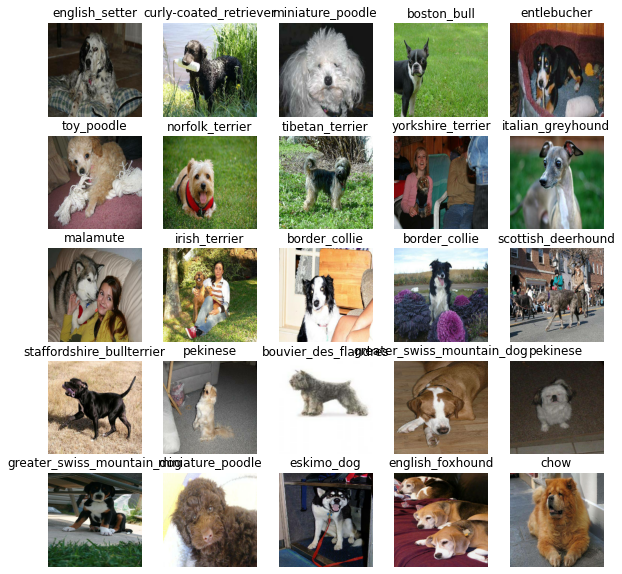

In [64]:
train_images , train_labels = next(train_data.as_numpy_iterator())
show_image_batch(train_images, train_labels)

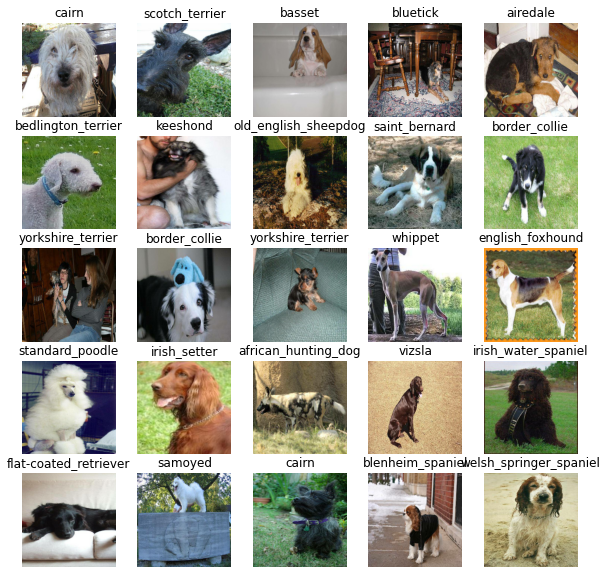

In [65]:
#batch for validation data
valid_images , valid_labels = next(valid_data.as_numpy_iterator())
show_image_batch(valid_images , valid_labels)

<h1>creating model</h1>

In [89]:
import os
input_shape = [None , IMG_SIZE , IMG_SIZE , 3]
output_shape = len(unique)
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4" 

In [90]:
def create_model(input_shape = input_shape , output_shape = output_shape , model_url = model_url):
    print("model build with: ", model_url)
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),
        tf.keras.layers.Dense(units = output_shape , activation = "softmax")
    ])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] )
    model.build(input_shape)
    return model

In [91]:
model = create_model()
model.summary()

model build with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [92]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [93]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [94]:
earlystopping = tf.keras.callbacks.EarlyStopping?


Init signature:
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Docstring:     
Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the
metric to be monitored would be `'loss'`, and mode would be `'min'`. A
`model.fit()` training loop will check at end of every epoch whether
the loss is no longer decreasing, considering the `min_delta` and
`patience` if applicable. Once it's found no longer decreasing,
`model.stop_training` is marked True and the training terminates.

The quantity to be monitored needs to be available in `logs` dict.
To make it so, pass the loss or metrics at `model.compile()`.

Arguments:
  monitor: Quantity to be monitored.
  min_delta: Minimum change in the monitored quantity
      to qualify as an improvement, i.e. an absolute
      change of less than min_delta,

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [95]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [96]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [97]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [98]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [99]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [100]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [101]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [102]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [103]:
earlystopping = tf.keras.callbacks.EarlyStopping

In [104]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy" , patience  =3)

In [105]:
epoch_num = 100

In [106]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x= train_data,
             epochs = epoch_num,
             validation_data = valid_data,
             validation_freq = 1,
             callbacks = [tensorboard , earlystopping])
    return model
    

In [107]:
model = train_model()

model build with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 5.4457 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\drunkeninja42\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 33s 1s/step - loss: 4.5805 - accuracy: 0.0938 - val_loss: 3.5485 - val_accuracy: 0.2100
Epoch 2/100
25/25 [==============================] - 28s 1s/step - loss: 1.6213 - accuracy: 0.7075 - val_loss: 2.2938 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 28s 1s/step - loss: 0.5620 - accuracy: 0.9325 - val_loss: 1.7809 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 28s 1s/step - loss: 0.2525 - accuracy: 0.9825 - val_loss: 1.5548 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 33s 1s/step - loss: 0.1459 - accuracy: 0.9962 - val_loss: 1.4846 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 35s 1s/step - loss: 0.0998 - accuracy: 1.0000 - val_loss: 1.4311 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 29s 1s/step - loss: 0.0750 - accuracy: 1.0000 - val_loss: 1.3953 - val_accuracy: 0.6650
Epoch 8/100
25/25 [======

In [108]:
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 36916.

In [109]:
predictions = model.predict(valid_data, verbose = 1)
predictions

7/7 [==============================] - 5s 697ms/step


array([[7.3353609e-04, 2.9511999e-05, 6.2518654e-04, ..., 3.5126254e-04,
        1.0296314e-05, 7.4316765e-04],
       [1.4123556e-03, 1.1902077e-04, 9.8903161e-03, ..., 4.2921153e-04,
        3.4427964e-03, 9.7442266e-05],
       [5.6394823e-05, 3.1716823e-05, 7.3373150e-05, ..., 3.0151245e-04,
        9.7171927e-05, 7.2619441e-05],
       ...,
       [1.0617351e-06, 1.0273712e-05, 8.1701153e-05, ..., 1.6011845e-06,
        1.8397168e-05, 4.0516421e-05],
       [3.9516888e-03, 1.8952691e-04, 6.6445617e-05, ..., 1.1997429e-04,
        1.1911514e-04, 1.3287629e-02],
       [9.7008981e-04, 9.2799428e-06, 9.5374091e-03, ..., 2.6127161e-03,
        1.5418266e-03, 3.8849652e-05]], dtype=float32)

In [110]:
predictions.shape

(200, 120)

In [111]:
print(predictions[0])

[7.33536086e-04 2.95119989e-05 6.25186542e-04 5.29250938e-05
 8.31478756e-05 1.23050595e-05 1.35757560e-02 2.17086938e-03
 9.37676115e-04 1.06620020e-03 6.99120457e-04 3.37481470e-05
 3.99669116e-05 5.42326488e-05 2.80386157e-04 1.03856284e-04
 1.22427873e-05 3.07835937e-01 2.85343685e-05 6.78157667e-05
 2.54942221e-04 5.97600047e-05 4.72275060e-05 4.35345370e-04
 1.61725675e-05 8.93105462e-05 4.37950552e-01 6.25474277e-05
 5.27018448e-04 7.76910572e-04 1.17719828e-04 1.75352790e-04
 1.37863168e-03 2.07804078e-05 1.95582383e-04 9.75272059e-03
 8.37186974e-07 5.53462960e-05 8.66941045e-05 1.36599978e-04
 7.23708014e-04 6.26921246e-05 1.73933513e-04 2.74287795e-05
 5.82015600e-05 3.25311012e-05 9.36978813e-06 7.42645861e-05
 3.76222160e-04 1.35653856e-04 2.85678747e-04 5.05621545e-04
 1.30072789e-04 6.11997530e-05 1.76699432e-05 7.31733735e-06
 4.33184381e-04 3.39126727e-03 2.58341141e-04 3.95107381e-02
 6.09384035e-04 1.53074252e-05 1.13241258e-03 6.19296861e-06
 4.44989797e-04 3.370300

In [112]:
print(np.max(predictions[0]))

0.43795055


In [113]:
np.sum(predictions[0])

1.0000002

In [114]:
np.argmax(predictions[0])

26

In [115]:
print(f"predicted label : {unique[np.argmax(predictions[0])]}")

predicted label : cairn


In [116]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  
  """  
  return unique[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [117]:
def unbatchify(data):
    images = []
    labels = []
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique[np.argmax(label)])
        
    return images,labels
    
    
# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [118]:
def plot_pred(prediction_probabilities , labels, images, n =1 ):
    pred_prob, truth_label, image = prediction_probabilities[n] , labels[n] , images[n]
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = get_pred_label(pred_prob)
    if pred_label == truth_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      truth_label),
                                      color=color)

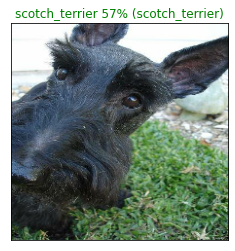

In [119]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [120]:
len(val_images)

200

In [121]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [122]:
def plot_pred_conf(prediction_probabilities, labels , n =1):
    pred_prob , truth_val = prediction_probabilities[n] , labels[n]
    
    pred_label = get_pred_label(pred_prob)
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique[top_10_pred_indexes]
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                          top_10_pred_values,
                          color = "grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels = top_10_pred_labels,
              rotation = "vertical")
    if np.isin(truth_val , top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels) == truth_val].set_color("green")
    else:
        pass
                            
    

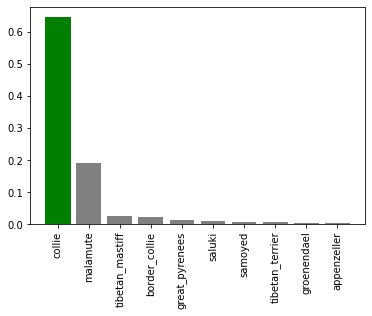

In [123]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

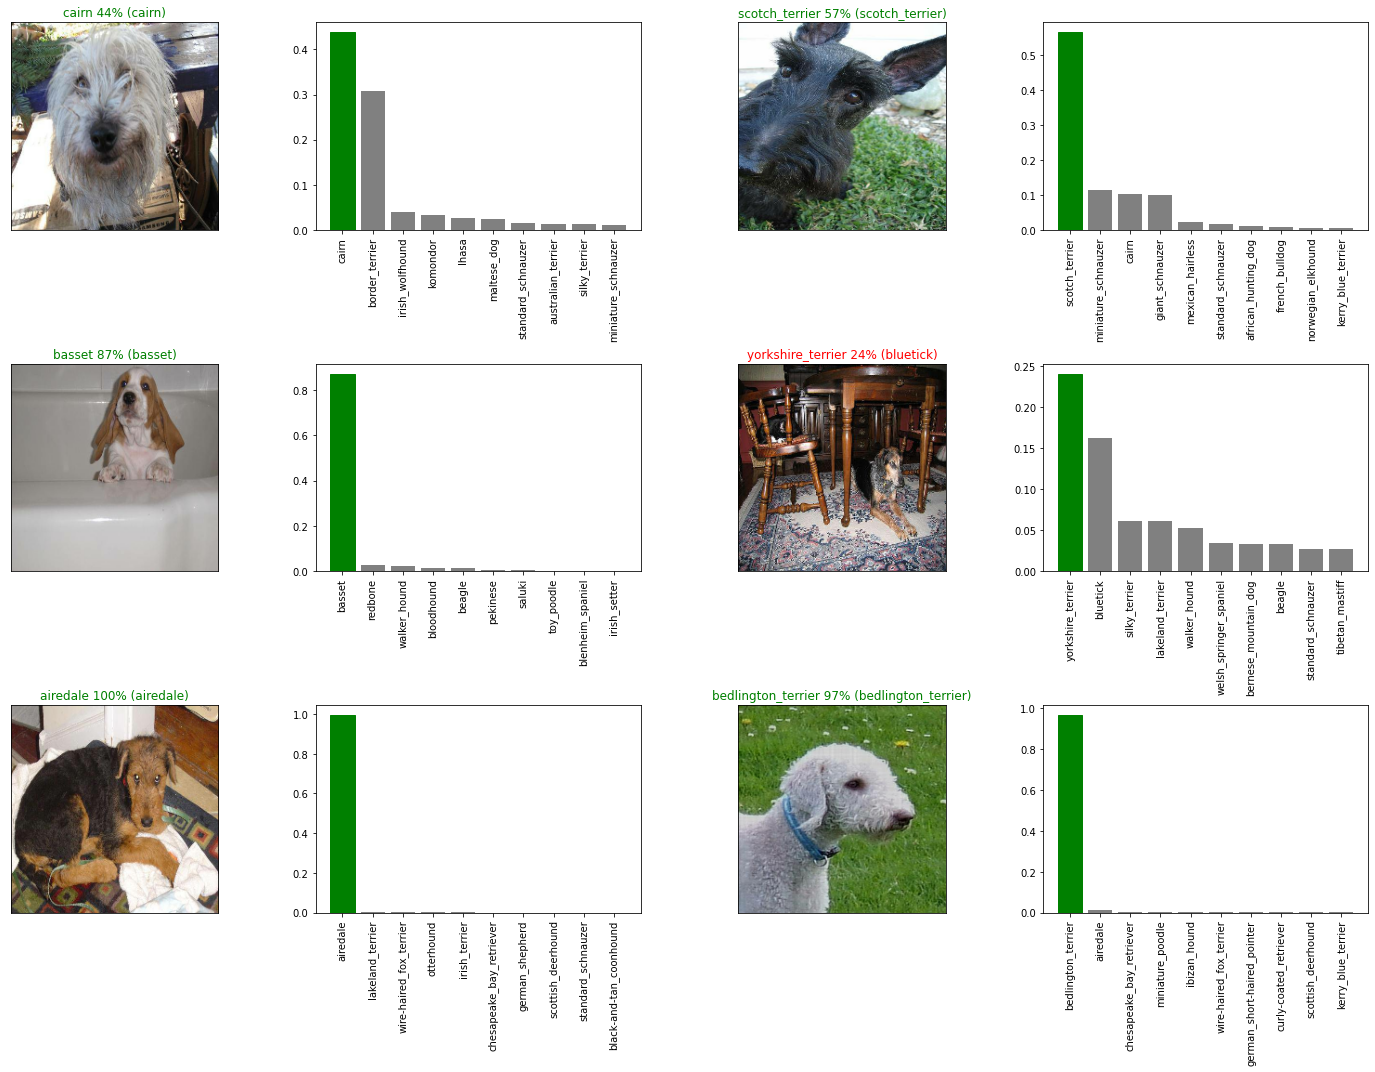

In [124]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [129]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time

  model_path = "dog breed classifier/models"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [130]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [131]:
saved_1000_image_model_path = save_model(model, suffix="1000-images-Adam")


Saving model to: dog breed classifier/models...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: dog breed classifier/models\assets


INFO:tensorflow:Assets written to: dog breed classifier/models\assets


In [132]:
loaded_model_1000_images = load_model(saved_1000_image_model_path)


Loading saved model from: dog breed classifier/models


<h1>Full data Training</h1>

In [133]:
full_data = create_data_batches(X,y)

creating training batches...


In [134]:
full_model = create_model()

model build with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [135]:
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy" , patience = 3)

In [136]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 37472), started 0:12:37 ago. (Use '!kill 37472' to kill it.)

In [137]:
full_model.fit(x = full_data , epochs= epoch_num , callbacks = [full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 283s 884ms/step - loss: 1.3455 - accuracy: 0.6737
Epoch 2/100
320/320 [==============================] - 293s 916ms/step - loss: 0.4000 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 292s 914ms/step - loss: 0.2367 - accuracy: 0.9368
Epoch 4/100
320/320 [==============================] - 308s 962ms/step - loss: 0.1526 - accuracy: 0.9654
Epoch 5/100
320/320 [==============================] - 300s 937ms/step - loss: 0.1048 - accuracy: 0.9788
Epoch 6/100
320/320 [==============================] - 293s 916ms/step - loss: 0.0771 - accuracy: 0.9875
Epoch 7/100
320/320 [==============================] - 297s 929ms/step - loss: 0.0599 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 305s 954ms/step - loss: 0.0455 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 291s 911ms/step - loss: 0.0378 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] -

In [139]:
test_path = "./inputs/dog-breed-identification/test/"
file_names = [test_path + fname for fname in os.listdir(test_path)]

In [140]:
file_names[:10]

['./inputs/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 './inputs/dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 './inputs/dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 './inputs/dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 './inputs/dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 './inputs/dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 './inputs/dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 './inputs/dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 './inputs/dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 './inputs/dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [141]:
len(file_names)

10357

In [142]:
test_data = create_data_batches(file_names, test_data = True)

creating test bacthes...


In [151]:
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

app = Flask(__name__)

In [143]:
test_predictions = full_model.predict(test_data,
                                      verbose=1)

324/324 [==============================] - 290s 895ms/step


In [165]:
save_full_model = save_model(full_model , suffix = "all-images-adam")

Saving model to: dog breed classifier/models...
INFO:tensorflow:Assets written to: dog breed classifier/models\assets


INFO:tensorflow:Assets written to: dog breed classifier/models\assets


In [166]:
loaded_full_model = load_model(save_full_model)

Loading saved model from: dog breed classifier/models
